In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import re
from datetime import datetime

data = pd.read_csv('mexican.csv')
data['As Of Date'] = pd.to_datetime(data['As Of Date'])
#data['Username'] = data['Username'].map({'Bojangles1977':'Bojangles','Bojangles':'Bojangles','Wingstop':'Wingstop','BuffaloWildWings':'BuffaloWildWings'})

In [2]:
data

,Ticker Symbol,Entity Name,Unique ID,As Of Date,Username,Checkins,Has App,Were Here Count,Likes,Talking About Count,Facebook Id,Date Added,Date Updated,Ticker Sector,Ticker Industry
0,nasdaq:taco,33436041410,38466069,2018-06-25,deltaco,510,False,362832,605590,2121,33436041410,2018-06-25 01:46:35,2018-06-25 01:46:35,NaN,NaN
1,nasdaq:frgi,6415052155,38465926,2018-06-25,TacoCabana,0,False,557719,353553,2138,6415052155,2018-06-25 01:44:35,2018-06-25 01:44:35,Consumer Services,Travel & Leisure
2,nasdaq:loco,84772351477,38467096,2018-06-25,ElPolloLoco,0,False,608640,435428,3589,84772351477,2018-06-26 01:28:29,2018-06-26 01:28:29,NaN,Food Producers
3,nasdaq:frgi,233921809956670,38461608,2018-06-14,PolloTropical,13775,False,13775,175415,521,233921809956670,2018-06-15 18:45:12,2018-06-15 18:45:12,Consumer Services,Travel & Leisure
4,nasdaq:frgi,6415052155,38457081,2018-06-13,TacoCabana,0,False,556042,353286,3360,6415052155,2018-06-13 18:53:07,2018-06-13 18:53:07,Consumer Services,Travel & Leisure
5,nasdaq:loco,84772351477,38457305,2018-06-13,ElPolloLoco,0,False,607526,434826,1333,84772351477,2018-06-13 18:53:37,2018-06-13 18:53:37,NaN,Food Producers
6,nasdaq:taco,33436041410,38457680,2018-06-13,deltaco,510,False,361514,606300,5359,33436041410,2018-06-13 18:54:30,2018-06-13 18:54:30,NaN,NaN
7,nasdaq:taco,33436041410,38449262,2018-06-08,deltaco,510,False,360797,606341,3566,33436041410,2018-06-08 17:24:03,2018-06-08 17:24:03,NaN,NaN
8,nasdaq:frgi,233921809956670,38448274,2018-06-08,PolloTropical,13773,False,13773,175296,361,233921809956670,2018-06-08 17:22:12,2018-06-08 17:22:12,Consumer Services,Travel & Leisure
9,nasdaq:loco,84772351477,38448653,2018-06-08,ElPolloLoco,0,False,606841,434816,1632,84772351477,2018-06-08 17:22:55,2018-06-08 17:22:55,NaN,Food Producers


In [3]:
data['Ticker Symbol'].unique()

array(['nasdaq:taco', 'nasdaq:frgi', 'nasdaq:loco'], dtype=object)

In [4]:
data['Username'].unique()

array(['deltaco', 'TacoCabana', 'ElPolloLoco', 'PolloTropical'], dtype=object)

Tickers and associated Usernames:
* 'nasdaq:taco' - Del Taco Restaurants (deltaco)
* 'nasdaq:frgi' - Fiesta Restaurant Group (TacoCabana,PolloTropical)
* 'nasdaq:loco' - El Pollo Loco (ElPolloLoco)

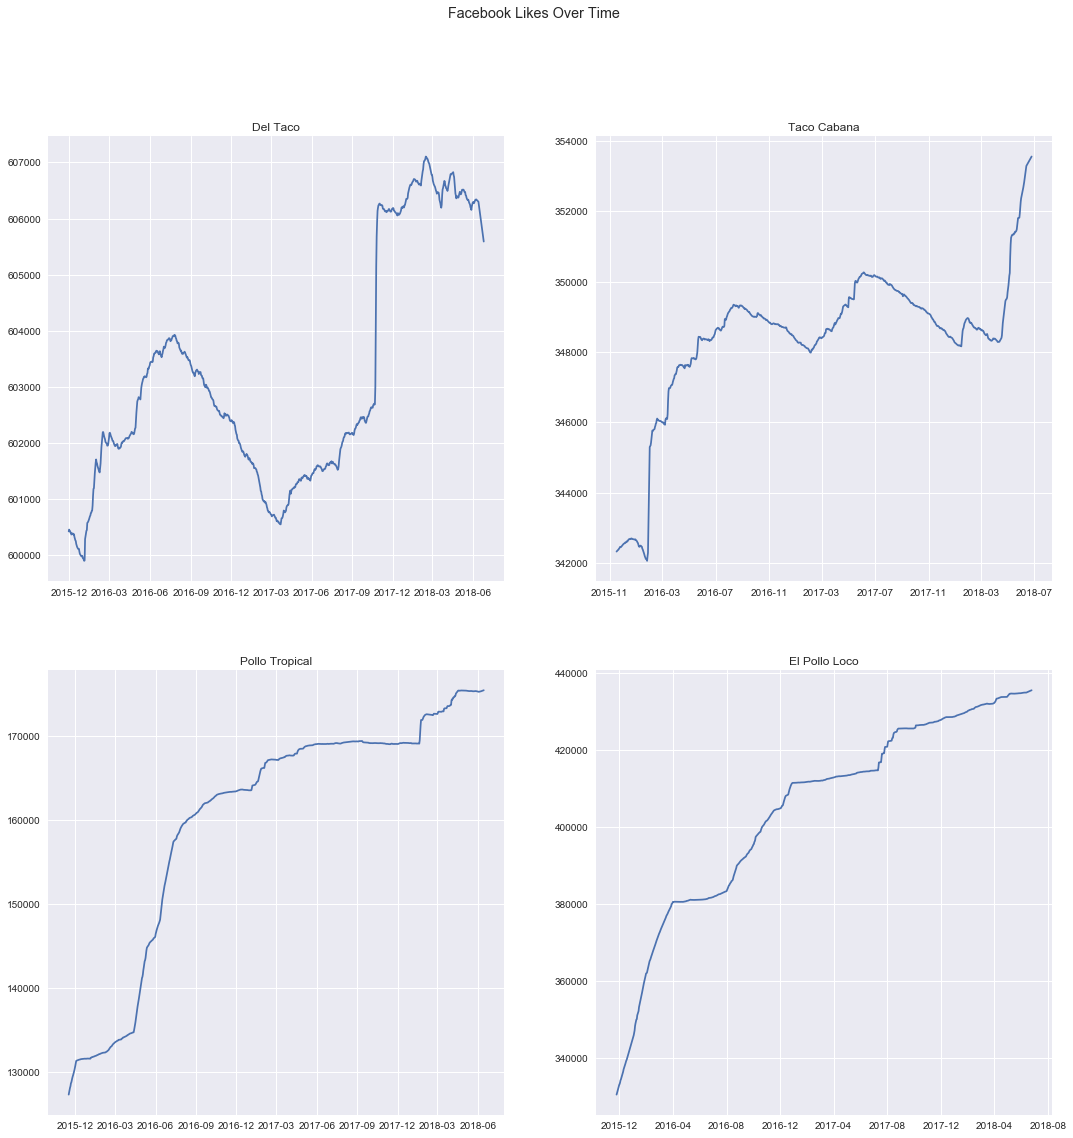

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig1, f1_axes = plt.subplots(ncols=2, nrows=2,figsize=(18,18))
fig1.suptitle('Facebook Likes Over Time')

plt.subplot(2, 2, 1)
plt.title('Del Taco')
df_taco = data[data['Username']== 'deltaco']
plt.plot(df_taco['As Of Date'],df_taco['Likes'])

plt.subplot(2, 2, 2)
plt.title('Taco Cabana')
df_bww = data[data['Username']=='TacoCabana']
plt.plot(df_bww['As Of Date'],df_bww['Likes'])

plt.subplot(2, 2, 3)
plt.title('Pollo Tropical')
df_boj = data[data['Username']=='PolloTropical']
plt.plot(df_boj['As Of Date'],df_boj['Likes'])

plt.subplot(2, 2, 4)
plt.title('El Pollo Loco')
df_loco = data[data['Username']=='ElPolloLoco']
plt.plot(df_loco['As Of Date'],df_loco['Likes'])

plt.show()

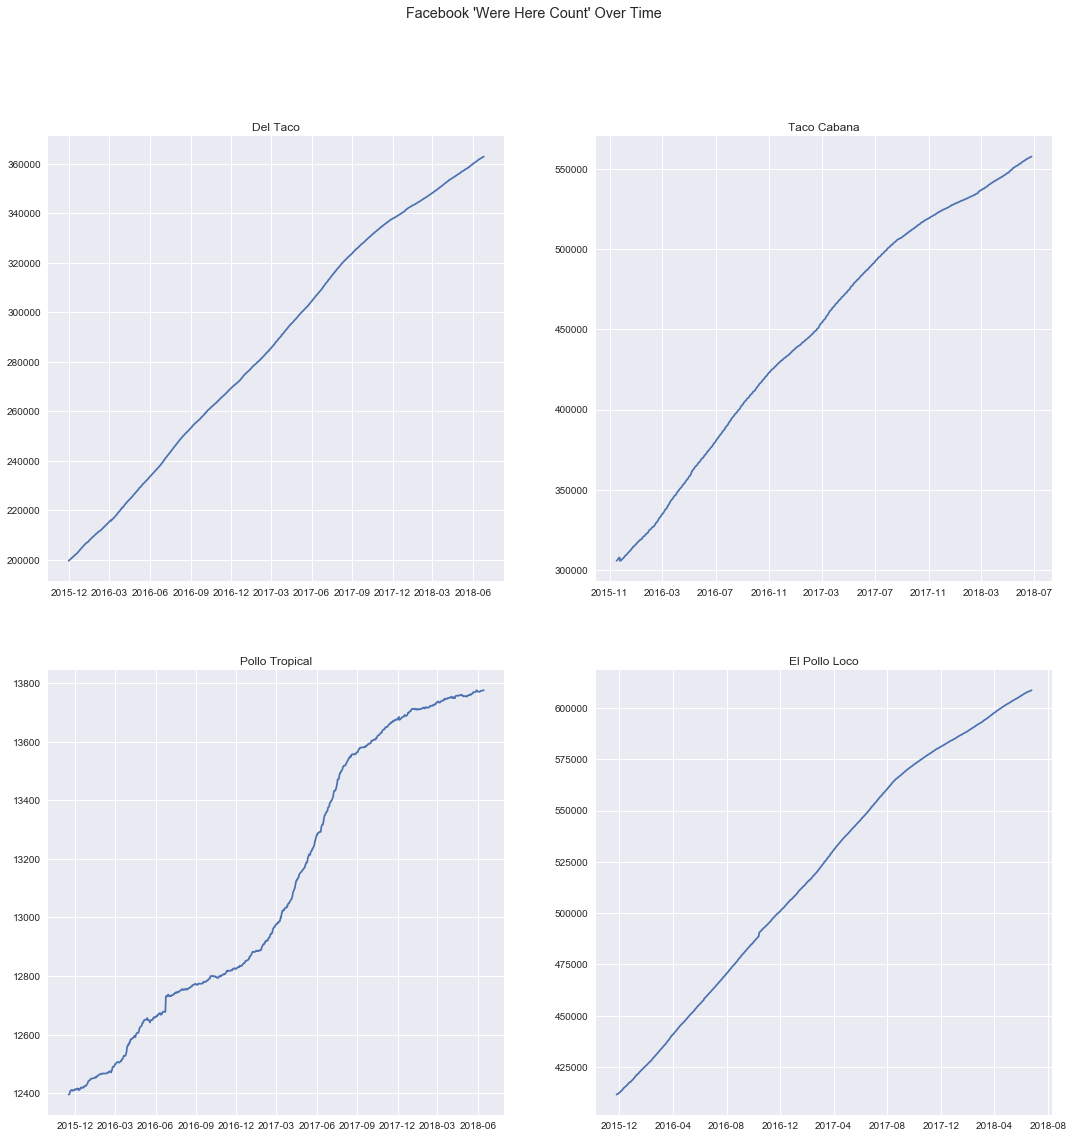

In [10]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2,figsize=(18,18))
fig1.suptitle("Facebook 'Were Here Count' Over Time")

plt.subplot(2, 2, 1)
plt.title('Del Taco')
df_taco = data[data['Username']== 'deltaco']
plt.plot(df_taco['As Of Date'],df_taco['Were Here Count'])

plt.subplot(2, 2, 2)
plt.title('Taco Cabana')
df_bww = data[data['Username']=='TacoCabana']
plt.plot(df_bww['As Of Date'],df_bww['Were Here Count'])

plt.subplot(2, 2, 3)
plt.title('Pollo Tropical')
df_boj = data[data['Username']=='PolloTropical']
plt.plot(df_boj['As Of Date'],df_boj['Were Here Count'])

plt.subplot(2, 2, 4)
plt.title('El Pollo Loco')
df_loco = data[data['Username']=='ElPolloLoco']
plt.plot(df_loco['As Of Date'],df_loco['Were Here Count'])

plt.show()